# Classical transformations 
## Graphs
<br>


In [1]:
# We disable autosave for technical reasons.
# Replace 0 by 120 in next line to restore default.
%autosave 0

Autosave disabled


In [2]:
import awalipy # If import fails, check that 
               # Python version used as Jupyter
               # kernel matches the one
               # Awalipy was compiled with.

[Warning] The python module awalipy relies on compilation executed "on-the-fly" depending on the context (type of weights, of labels, etc.). As a result, the very first call to a given function in a given context may take up to 10 seconds. 


## Strongly connected components

Let us consider an arbitrary random.  
(It is probable that `generate_DFA` produces a strongly connected automaton, hence the sligthly convoluted code below. )

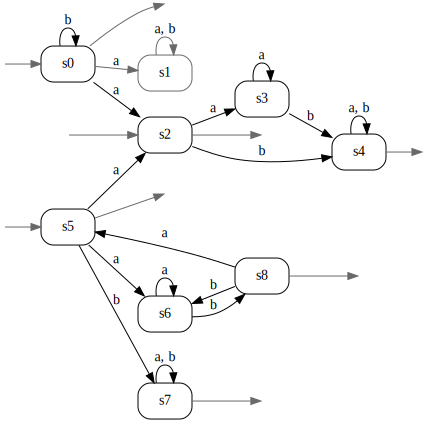

In [3]:
A = awalipy.generate_DFA(2,"ab")
B = awalipy.generate_DFA(3,"ab")
C = awalipy.generate_DFA(4,"ab")
D = A.union(B).union(C)
D.set_transition(0,2,"a")
D.set_transition(5,2,"a")
D.display()

---
The method `sccs` gives the list of the strongly connected components that is, a `list` of `list` of `int`. 

In [4]:
D.sccs()

[[4], [3], [2], [1], [0], [7], [8, 6, 5]]

---
The method `scc_of(stt_id)` gives the list of the states that may reach and may be reached from `stt_id`.

In [5]:
D.scc_of(4)

[4]

## Accessible, co-accessible, trim

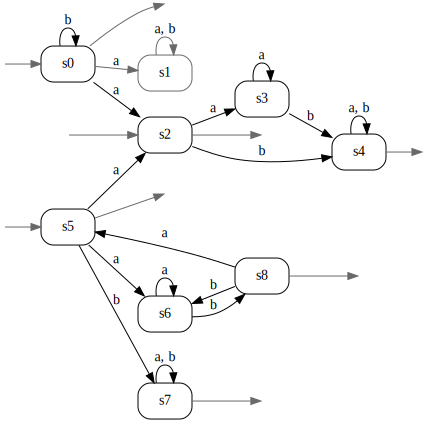

In [6]:
E = D.copy()
E.display()

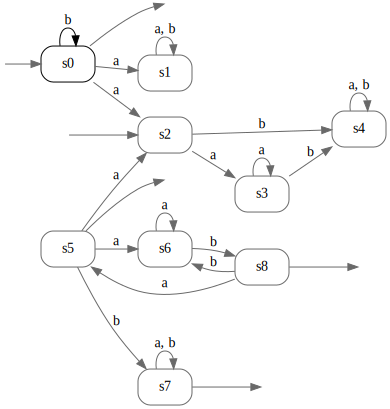

In [7]:
for i in [5,6,7,8] :
    E.unset_initial(i)
for i in [2,3,4] :
    E.unset_final(i)
E.display()

### Accessible
A state is *accessible* if it may be reached from an initial state.

In [8]:
E.accessible_states()

[0, 1, 2, 3, 4]

---
The method `accessible` returns the restriction of tha tuatomaton to its accessible states (and `accessible_here` does the same thing *in place*).

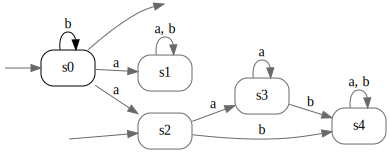

In [9]:
E.accessible().display()

### Co-accessible

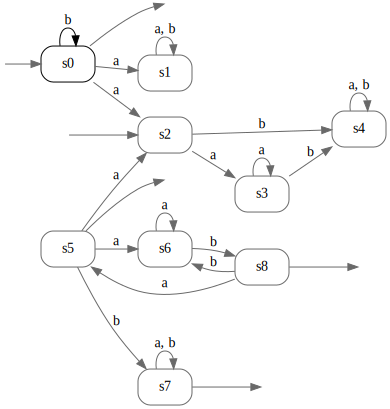

In [10]:
E.display()

---
A state is `co-accessible` if there is a path from it to a final state.

In [11]:
E.coaccessible_states()

[0, 5, 6, 7, 8]

---
The method `coaccessible` returns the restriction of tha automaton to its co-accessible states (and `coaccessible_here` does the same thing *in place*).

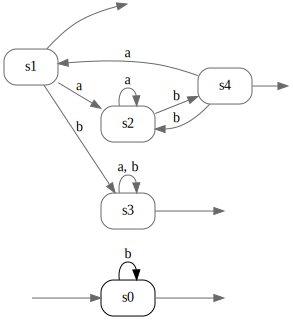

In [12]:
E.coaccessible().display()


### Useful states, trim part

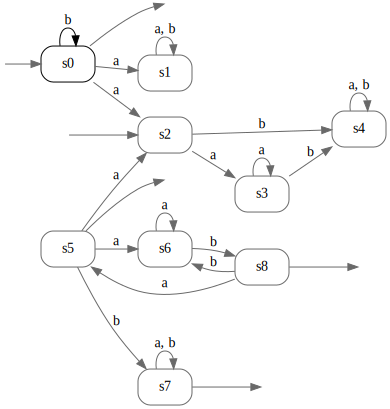

In [13]:
E.display()

---
A state is *useful* if there it is both accessible and co-accessible.

In [14]:
E.useful_states()

[0]

---
The method `trim` returns the restriction of tha automaton to its co-accessible states (and `trim_here` does the same thing *in place*).

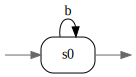

In [15]:
E.trim().display()